In [11]:
file = open("vectors.txt","r")
data = file.readlines()
Nlines = len(data)
print("Nlines = ",Nlines)

Nlines =  278


In [12]:
wfile = open("words_idx.txt","r")
words = wfile.readlines()
Nwords = len(words)
print("Nwords = ",Nwords)

Nwords =  18446


In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
Ndocs = int(Nlines/2)
A = np.zeros((Nwords,Ndocs))
Doc_idx = np.zeros((Ndocs,))
label = np.zeros((Ndocs,))
for j in range(Ndocs):
    Doc_idx = data[2*j]
    line = data[2*j+1]
    line = line.split()
    numbers = [eval(i) for i in line]
    label = numbers[0]
    w_idx = np.array(numbers[1::2])-1 # make indices start from 0
    w_count = numbers[2::2]
    A[w_idx,j] = 1       
# np.savetxt("Amatrix.csv", A, delimiter=",")

In [15]:
k = 10
W = np.random.rand(Nwords,k)
H = np.random.rand(k,Ndocs)
iter_max = 200

In [16]:
R_FroNorm = np.zeros(iter_max)
for iter in range(iter_max):
    Wnew = W*np.matmul(A,np.transpose(H))/(np.matmul(W,np.matmul(H,np.transpose(H))))
    W = Wnew
    Wt = np.transpose(W)
    Hnew = H*np.matmul(Wt,A)/(np.matmul(np.matmul(Wt,W),H))
    H = Hnew
    R = A - np.matmul(W,H)
    R_FroNorm[iter] = np.linalg.norm(R,'fro')


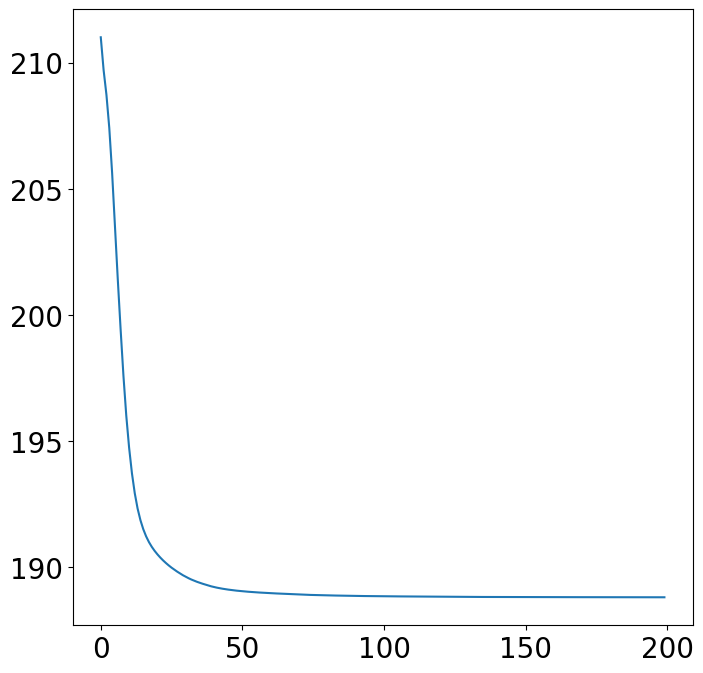

In [17]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (8,8))
plt.plot(R_FroNorm)

[]
[]
[]
[]
[]
[0.42504825 0.53368254 0.45018211 0.53658788 0.46263181 0.46957566
 0.39732501 0.42476686 0.53273798 0.43365748 0.50535825 0.30089226
 0.49001354 0.4514695  0.47286278 0.42912749 0.33292553 0.32578419
 0.31272443 0.35106493 0.49403051 0.42234459 0.34286017 0.31821391
 0.31696657 0.33327349 0.30221383 0.39808871 0.3886008  0.38034501
 0.30311928 0.33944221]
7 7 home

8 8 the

10 10 your

18 18 and

36 36 this

37 37 you

38 38 will

44 44 can

46 46 for

48 48 from

52 52 gif

54 54 click

55 55 our

67 67 all

69 69 are

147 147 contact

163 163 here

164 164 not

190 190 please

199 199 one

219 219 with

228 228 that

239 239 information

276 276 jpg

291 291 service

325 325 new

370 370 any

385 385 about

490 490 more

539 539 have

600 600 page

605 605 other

[]
[]
[]
[]


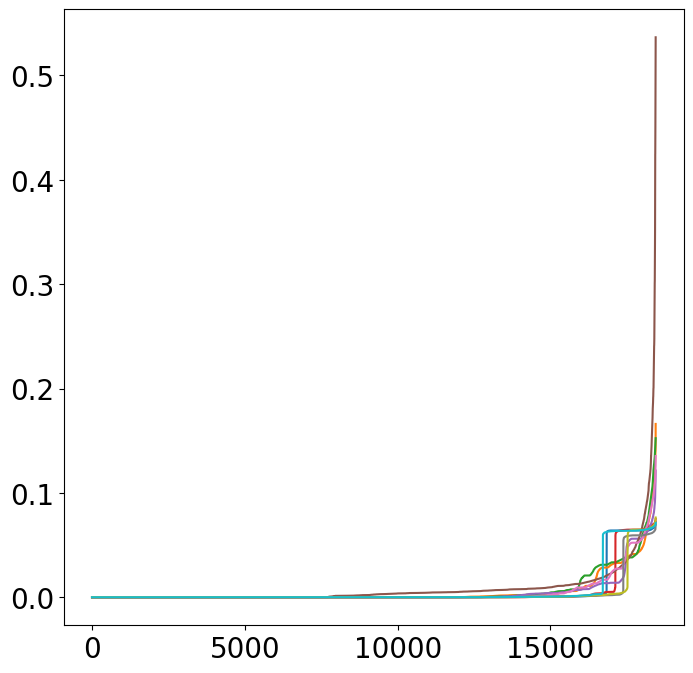

In [21]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (8,8))
for j in range(k):
    ind = np.squeeze(np.argwhere(W[:,j] > 0.3))
    print(W[ind,j])
    plt.plot(np.sort(W[:,j]))
    if len(ind.tolist()) > 0:
        for i in range(len(ind.tolist())):
            print(ind[i]+1,words[ind[i]])